# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
states_edu_df = pd.read_csv(f"/content/drive/MyDrive/College/Freshman Docs Sem 1/Clubs/UMDS/DataSets/states_edu.csv")
display(states_edu_df)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
#take a peek at how many NA
states_edu_df.isna().sum()

,0
PRIMARY_KEY,0
STATE,0
YEAR,0
ENROLL,491
TOTAL_REVENUE,440
FEDERAL_REVENUE,440
STATE_REVENUE,440
LOCAL_REVENUE,440
TOTAL_EXPENDITURE,440
INSTRUCTION_EXPENDITURE,440


In [ ]:
states_edu_df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
cleaned_states_edu_df = states_edu_df.dropna()
display(states_edu_df) #from 1700 -> 1200 columns

display(cleaned_states_edu_df)

score_only = pd.concat([states_edu_df.iloc[:, 0:3], states_edu_df.iloc[:, -4:]], axis=1)
score_only.dropna(inplace = True)
display(score_only)

score_8mathScore_only = pd.concat([states_edu_df.iloc[:, 0:3], states_edu_df["AVG_MATH_8_SCORE"]], axis=1)
score_8mathScore_only.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
display(score_8mathScore_only)


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


,PRIMARY_KEY,STATE,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,242.0,289.0,220.0,267.0


,PRIMARY_KEY,STATE,YEAR,AVG_MATH_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,252.0
2,1992_ARIZONA,ARIZONA,1992,265.0
3,1992_ARKANSAS,ARKANSAS,1992,256.0
4,1992_CALIFORNIA,CALIFORNIA,1992,261.0
5,1992_COLORADO,COLORADO,1992,272.0
...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,287.0
1711,2019_WASHINGTON,WASHINGTON,2019,286.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,272.0
1713,2019_WISCONSIN,WISCONSIN,2019,289.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset?

In [ ]:
# @@@ 1
# Your Code
print(len(states_edu_df["YEAR"].unique()))
print(len(cleaned_states_edu_df["YEAR"].unique()))
print(len(score_only["YEAR"].unique()))
print(len(score_8mathScore_only["YEAR"].unique()))

33
7
10
13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
# @@@ 2
#for this, using the score only might be more accurate, in fact, for increase accuracy, i'll change the
#name of this dataframe
import numpy as np
import pandas as pd

def comparison(mich, ohio):
  if mich > ohio:
    return f"Michigan has the higher average than Ohio with a grade of {mich} compared to {ohio}"
  elif mich < ohio:
    return f"Ohio has the higher average than Michigan with a grade of {ohio} compared to {mich}"
  else:
    return f"Tie with: {ohio}"


states_edu_score_only_df = score_only.copy()
avg_mich_8math = round(np.mean(states_edu_score_only_df[states_edu_score_only_df["STATE"]=="MICHIGAN"]["AVG_MATH_8_SCORE"]),2)
avg_ohio_8math = round(np.mean(states_edu_score_only_df[states_edu_score_only_df["STATE"]=="OHIO"]["AVG_MATH_8_SCORE"]),2)

avg_mich_4math = round(np.mean(states_edu_score_only_df[states_edu_score_only_df["STATE"]=="MICHIGAN"]["AVG_MATH_4_SCORE"]),2)
avg_ohio_4math = round(np.mean(states_edu_score_only_df[states_edu_score_only_df["STATE"]=="OHIO"]["AVG_MATH_4_SCORE"]),2)

avg_mich_4read = round(np.mean(states_edu_score_only_df[states_edu_score_only_df["STATE"]=="MICHIGAN"]["AVG_READING_4_SCORE"]),2)
avg_ohio_4read = round(np.mean(states_edu_score_only_df[states_edu_score_only_df["STATE"]=="OHIO"]["AVG_READING_4_SCORE"]),2)

avg_mich_8read = round(np.mean(states_edu_score_only_df[states_edu_score_only_df["STATE"]=="MICHIGAN"]["AVG_READING_8_SCORE"]),2)
avg_ohio_8read = round(np.mean(states_edu_score_only_df[states_edu_score_only_df["STATE"]=="OHIO"]["AVG_READING_8_SCORE"]),2)

print(comparison(avg_mich_8math, avg_ohio_8math))
print(comparison(avg_mich_4math, avg_ohio_8math))
print(comparison(avg_mich_8read, avg_ohio_8read))
print(comparison(avg_mich_4read, avg_ohio_4read))



Ohio has the higher average than Michigan with a grade of 286.0 compared to 278.44
Ohio has the higher average than Michigan with a grade of 286.0 compared to 236.56
Ohio has the higher average than Michigan with a grade of 267.67 compared to 263.33
Ohio has the higher average than Michigan with a grade of 224.0 compared to 218.11


Find the average for your chosen test across all states in 2019

In [ ]:
# @@@ 3

#since i'll choose 8 math from now on so i'll create this df

score_8mathScore_only = pd.concat([states_edu_df.iloc[:, 0:3], states_edu_df["AVG_MATH_8_SCORE"]], axis=1)
score_8mathScore_only.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
display(score_8mathScore_only)



,PRIMARY_KEY,STATE,YEAR,AVG_MATH_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,252.0
2,1992_ARIZONA,ARIZONA,1992,265.0
3,1992_ARKANSAS,ARKANSAS,1992,256.0
4,1992_CALIFORNIA,CALIFORNIA,1992,261.0
5,1992_COLORADO,COLORADO,1992,272.0
...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,287.0
1711,2019_WASHINGTON,WASHINGTON,2019,286.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,272.0
1713,2019_WISCONSIN,WISCONSIN,2019,289.0


In [ ]:
average_2019_8math = round(np.mean(score_8mathScore_only[score_8mathScore_only["YEAR"]==2019]["AVG_MATH_8_SCORE"]),2)
print(average_2019_8math)

281.26


For each state, find a maximum value for your chosen test score

In [ ]:
list_cet = list(score_8mathScore_only["STATE"].unique())
list_cet

for i in list_cet:
  print(i + ": " + str(max(score_8mathScore_only[score_8mathScore_only["STATE"]==i]["AVG_MATH_8_SCORE"]) ))

ALABAMA: 269.0
ARIZONA: 283.0
ARKANSAS: 279.0
CALIFORNIA: 277.0
COLORADO: 292.0
CONNECTICUT: 289.0
DELAWARE: 284.0
DISTRICT_OF_COLUMBIA: 269.0
FLORIDA: 281.0
GEORGIA: 281.0
HAWAII: 281.0
IDAHO: 287.0
INDIANA: 288.0
IOWA: 286.0
KENTUCKY: 282.0
LOUISIANA: 273.0
MAINE: 289.0
MARYLAND: 288.0
MASSACHUSETTS: 301.0
MICHIGAN: 280.0
MINNESOTA: 295.0
MISSISSIPPI: 274.0
MISSOURI: 286.0
NEBRASKA: 288.0
NEW_HAMPSHIRE: 296.0
NEW_JERSEY: 296.0
NEW_MEXICO: 274.0
NEW_YORK: 283.0
NORTH_CAROLINA: 286.0
NORTH_DAKOTA: 293.0
OHIO: 290.0
OKLAHOMA: 279.0
PENNSYLVANIA: 290.0
RHODE_ISLAND: 284.0
SOUTH_CAROLINA: 282.0
TENNESSEE: 280.0
TEXAS: 290.0
UTAH: 287.0
VIRGINIA: 290.0
WEST_VIRGINIA: 274.0
WISCONSIN: 289.0
WYOMING: 289.0
ILLINOIS: 285.0
KANSAS: 290.0
MONTANA: 293.0
NEVADA: 278.0
OREGON: 285.0
VERMONT: 295.0
ALASKA: 283.0
SOUTH_DAKOTA: 291.0
WASHINGTON: 290.0
NATIONAL: 285.0
DODEA: 293.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5
#so i'll take you example of expenditure_per_student idea
#in which expenditure_per_student = total_experience/enroll
#thus, i'll have this dataframe

expend_per_stu_df = pd.concat([
    states_edu_df.iloc[:, 0:3],
    states_edu_df[["TOTAL_EXPENDITURE", "ENROLL_ALL", "AVG_MATH_8_SCORE"]]
], axis=1)

expend_per_stu_df.dropna(subset=["TOTAL_EXPENDITURE", "ENROLL_ALL", "AVG_MATH_8_SCORE"], inplace=True)

expend_per_stu_df["EXPENDITURE_PER_STUDENT"] = expend_per_stu_df["TOTAL_EXPENDITURE"] / expend_per_stu_df["ENROLL_ALL"]

display(expend_per_stu_df)


,PRIMARY_KEY,STATE,YEAR,TOTAL_EXPENDITURE,ENROLL_ALL,AVG_MATH_8_SCORE,EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,2653798.0,731634.0,252.0,3.627221
2,1992_ARIZONA,ARIZONA,1992,3401580.0,673477.0,265.0,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,1743022.0,441490.0,256.0,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,27138832.0,5254844.0,261.0,5.164536
5,1992_COLORADO,COLORADO,1992,3264826.0,612635.0,272.0,5.329154
...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,16113212.0,1283590.0,288.0,12.553239
1220,2015_WASHINGTON,WASHINGTON,2015,13630138.0,1087030.0,287.0,12.538879
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,3466981.0,277452.0,271.0,12.495787
1222,2015_WISCONSIN,WISCONSIN,2015,11553677.0,867800.0,289.0,13.313755


In [ ]:
states_edu_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

The new column, EXPENDITURE_PER_STUDENT, represents how much money a state spends per student

When we compare to the columns of AVG_MATH_8_GRADE -> a correlatable incrementation.

both increase and complimentary to each other.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

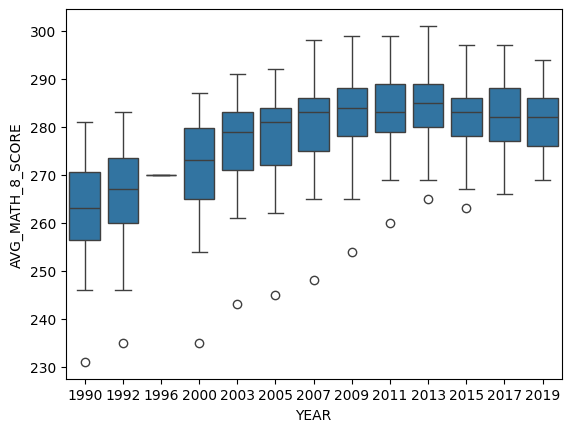

In [ ]:
# @@@ 6

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data = score_8mathScore_only, x="YEAR", y="AVG_MATH_8_SCORE")
plt.show()

**<CAPTION FOR VIZ 1>**

**Visualization 2**

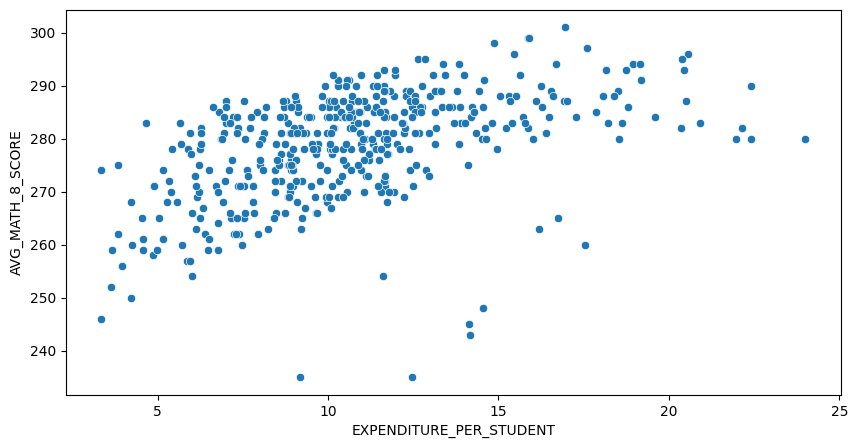

In [ ]:
# @@@ 7
plt.figure(figsize=(10,5))
sns.scatterplot(data = expend_per_stu_df, x="EXPENDITURE_PER_STUDENT", y="AVG_MATH_8_SCORE")
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
display(states_edu_df)
model_training_datasets = pd.concat([states_edu_df.iloc[: ,0:2], states_edu_df.iloc[: ,-3:]], axis = 1)
model_training_datasets["ENROLL_8"] = states_edu_df["ENROLL_8"]
model_training_datasets.dropna(inplace = True)
display(model_training_datasets)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


,PRIMARY_KEY,STATE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,ENROLL_8
561,2003_ALABAMA,ALABAMA,262.0,207.0,253.0,59663.0
562,2003_ALASKA,ALASKA,279.0,212.0,256.0,11140.0
563,2003_ARIZONA,ARIZONA,271.0,209.0,255.0,76376.0
564,2003_ARKANSAS,ARKANSAS,266.0,214.0,258.0,37004.0
565,2003_CALIFORNIA,CALIFORNIA,267.0,206.0,251.0,500143.0
...,...,...,...,...,...,...
1603,2017_VIRGINIA,VIRGINIA,290.0,228.0,268.0,96881.0
1610,2017_WASHINGTON,WASHINGTON,289.0,223.0,272.0,81798.0
1617,2017_WEST_VIRGINIA,WEST_VIRGINIA,273.0,217.0,259.0,19958.0
1624,2017_WISCONSIN,WISCONSIN,288.0,220.0,269.0,62359.0


In [ ]:
# @@@ 8
#I will also use ENROLL_8, AVG_MATH_8_SCORE, and AVG_READING_4_SCORE and y as AVD_READING_8_SCORE respective to the answer
#of the tutorial file

X = model_training_datasets[['ENROLL_8','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = model_training_datasets.loc[X.index]['AVG_READING_8_SCORE'].dropna()

In [ ]:
# @@@ 9
#using test to be 20% of the whole dataset is suffice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


Model_score_correlation = make_pipeline(StandardScaler(), LinearRegression())
Model_score_correlation.fit(X_train, y_train)
y_pred = Model_score_correlation.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
# @@@ 12
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def model_evaluation(y_test, y_pred):
  print(f"R2: {r2_score(y_test, y_pred)}")
  print(f"MSE: {mean_squared_error(y_test, y_pred)}")
  print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

model_evaluation(y_test, y_pred)

R2: 0.8594237690915713
MSE: 6.0195436175355965
MAE: 2.034983719773639
MAPE: 0.007753352198191066


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set between AVG_READING_8_SCORE and AVG_READING_4_SCORE')

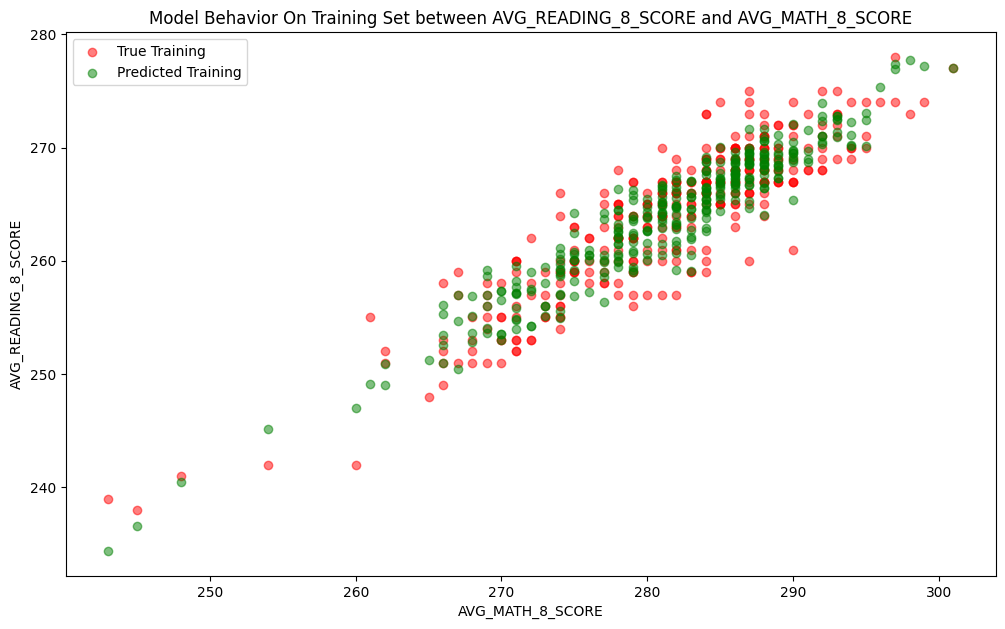

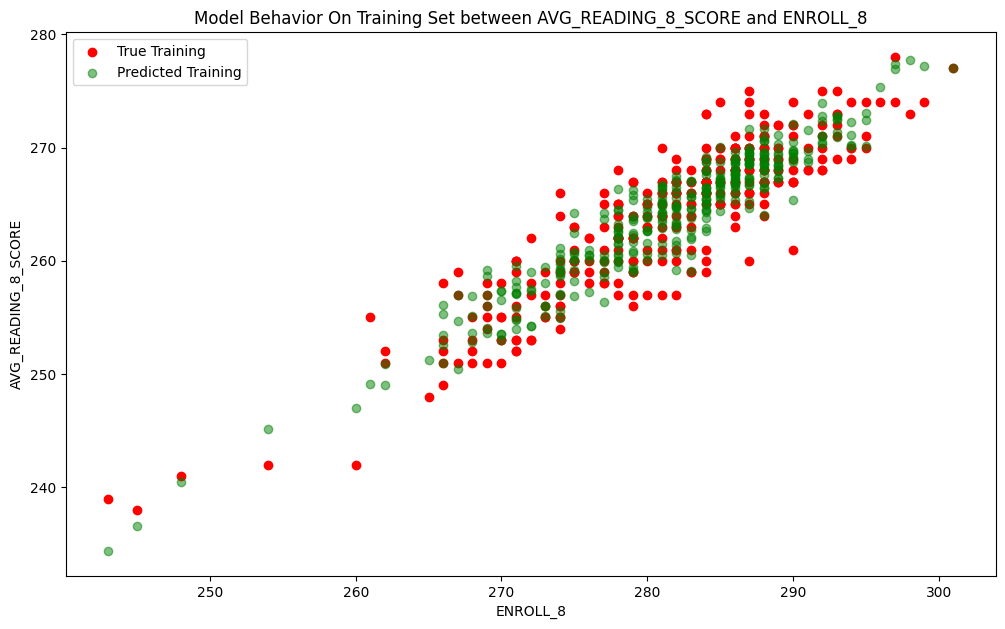

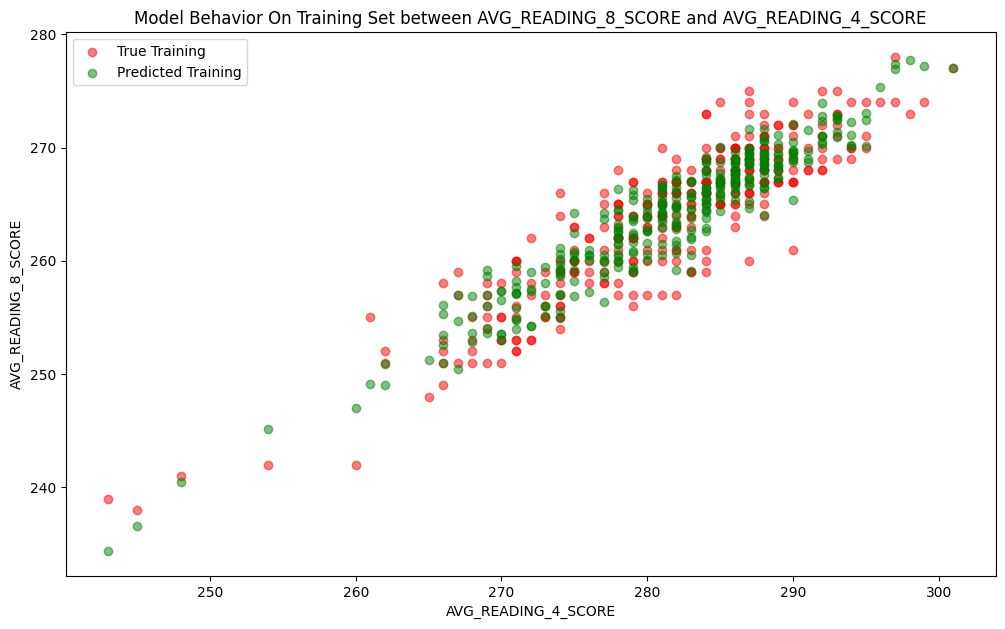

In [ ]:
# @@@ 13,14

col_name_1 = 'AVG_MATH_8_SCORE'


f = plt.figure(figsize=(12,24))
plt.subplot(3,1,1)
plt.scatter(X_train[col_name_1], y_train, color = "red", alpha = 0.5)
plt.scatter(X_train[col_name_1], Model_score_correlation.predict(X_train), color = "green", alpha = 0.5)

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name_1)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior On Training Set between AVG_READING_8_SCORE and AVG_MATH_8_SCORE")



col_name_2 = 'ENROLL_8'


f = plt.figure(figsize=(12,24))
plt.subplot(3,1,2)
plt.scatter(X_train[col_name_1], y_train, color = "red")
plt.scatter(X_train[col_name_1], Model_score_correlation.predict(X_train), color = "green", alpha = 0.5)

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name_2)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior On Training Set between AVG_READING_8_SCORE and ENROLL_8")




col_name_3 = 'AVG_READING_4_SCORE'


f = plt.figure(figsize=(12,24))
plt.subplot(3,1,3)
plt.scatter(X_train[col_name_1], y_train, color = "red", alpha = 0.5)
plt.scatter(X_train[col_name_1], Model_score_correlation.predict(X_train), color = "green", alpha = 0.5)

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name_3)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior On Training Set between AVG_READING_8_SCORE and AVG_READING_4_SCORE")

In [ ]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")